# Udacity - CRISP-DM Project - Berlin’s Airbnb market in 2019 /2020

## 1. BUSINESS UNDERSTANDING

The Berlin AirBnB Dataset contains data about AirBnB listings in Berlin, calendar availability for each of these listings as well as user reviews on the listings. Using this dataset, I am going to attempt to answer the following business questions.

#### Pricing Trends
1. How does pricing increase or decrease by season and what is the peak season in Berlin?
2. How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Berlin?
3. How does property types within neighborhoods impact price for the most expensive neighborhoods and most common property types?

#### Sentiment Analysis of Reviews
4. How can we categorize reviews based on sentiments?
5. Can we map positive and negative sentiments from reviews to neighborhoods to understand which neighborhoonds rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale?
6. Can we explore some of the worst reviews for additional insights?

#### Price Prediction
Can we predict price for a given listing?
What factors of the listing correlate best for predicting price?

Pricing trend related questions can help understand peak seasons and neighborhood in Berlin and can allow AirBnB to regulate inventory accordingly. It can also help with targeting more effective marketing campaigns.

Sentiment analysis of reviews can give AirBnB insight into brand affinity and gauge consumer interest. In addition, associating the sentiments with neighborhoods can detect problematic neighborhoods.

Price prediction can help understand what factors mostly correlate with price. This is helpful so these features can be top of mind for AirBnB as well as AirBnB hosts.

## 2. DATA UNDERSTANDING

### Let's explore the data

As a first step, I will be reading the 3 files part of the Berlin AirBnB dataset and exploring each of the datasets a bit.

In [7]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
# Read in the calendar data set
df_calendar = pd.read_csv('./Berlin/calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,38570229,2019-09-19,t,$130.00,$130.00,1,1125
1,38570229,2019-09-20,t,$142.00,$142.00,1,1125
2,38570229,2019-09-21,t,$158.00,$158.00,1,1125
3,38570229,2019-09-22,t,$129.00,$129.00,1,1125
4,38570229,2019-09-23,f,$129.00,$129.00,1,1125


In [9]:
# Read in the listings data set
df_listings = pd.read_csv('./Berlin/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1944,https://www.airbnb.com/rooms/1944,20190919050244,2019-09-19,cafeheaven Pberg/Mitte/Wed for the summer 2019,"Private, bright and friendly room. You'd be sh...","The room is very large, private, cozy, bright,...","Private, bright and friendly room. You'd be sh...",none,near all the trendy cafés and flea markets and...,...,f,f,moderate,f,f,1,0,1,0,0.25
1,2015,https://www.airbnb.com/rooms/2015,20190919050244,2019-09-19,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,moderate,f,f,5,5,0,0,3.03
2,3176,https://www.airbnb.com/rooms/3176,20190919050244,2019-09-19,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.16
3,3309,https://www.airbnb.com/rooms/3309,20190919050244,2019-09-19,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.36
4,6883,https://www.airbnb.com/rooms/6883,20190919050244,2019-09-19,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,f,f,moderate,f,t,1,1,0,0,1.08


In [10]:
# Read in the reviews data set
df_reviews = pd.read_csv('./Berlin/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1944,7126992,2013-09-07,8207524,Mirko,I want to thank Laura&Emiliano for their hospi...
1,1944,7428447,2013-09-19,3021574,Rafiee,Very convenient and very quiet. You will stay...
2,1944,8455250,2013-10-31,5875429,Grzegorz,I've spent 2 nights at place of Laura and Emil...
3,1944,11105498,2014-03-20,5361252,Ngọc Thúy,The reservation was canceled 2 days before arr...
4,1944,15920963,2014-07-18,6659444,Nathalie,Laura est très sympathique et l'appartement fa...


### CALENDAR Data Set

Let's explore the Calendar data set first. We wil be looking at a few things:
1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column


In [11]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_calendar.shape)
# Assess null values
print(df_calendar.isnull().sum())
# Describe
print(df_calendar.describe(include='all'))

Number of rows and columns:  (8914030, 7)
listing_id          0
date                0
available           0
price             182
adjusted_price    182
minimum_nights      0
maximum_nights      0
dtype: int64
          listing_id        date available    price adjusted_price  \
count   8.914030e+06     8914030   8914030  8913848        8913848   
unique           NaN         387         2      893            901   
top              NaN  2019-11-14         f   $50.00         $50.00   
freq             NaN       24422   7094101   448022         447563   
mean    1.967378e+07         NaN       NaN      NaN            NaN   
std     1.110589e+07         NaN       NaN      NaN            NaN   
min     1.944000e+03         NaN       NaN      NaN            NaN   
25%     9.921767e+06         NaN       NaN      NaN            NaN   
50%     2.010907e+07         NaN       NaN      NaN            NaN   
75%     2.907832e+07         NaN       NaN      NaN            NaN   
max     3.873117e+07 

#### FINDINGS

Based on the above, it seems like there will be little data prep required to use this dataset. The only missing values are in the price column which could be just due to the fact that the listing is unavailable for those days.

### LISTINGS Data Set

Next, let's explore the Listings data set. We wil be looking at a few things:
1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column
4. Explore some of the categorical features

In [12]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_listings.shape)
# Assess null values
print(df_listings.isnull().sum())

Number of rows and columns:  (24422, 106)
id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               51
summary                                          1191
space                                            8588
description                                       385
experiences_offered                                 0
neighborhood_overview                           10872
notes                                           16554
transit                                          9479
access                                          13100
interaction                                     12241
house_rules                                     12042
thumbnail_url                                   24422
medium_url                                      24422
picture_url                             

In [13]:
# Describe
print(df_listings.describe(include='all'))

                  id                            listing_url     scrape_id  \
count   2.442200e+04                                  24422  2.442200e+04   
unique           NaN                                  24422           NaN   
top              NaN  https://www.airbnb.com/rooms/19484828           NaN   
freq             NaN                                      1           NaN   
mean    1.967378e+07                                    NaN  2.019092e+13   
std     1.110612e+07                                    NaN  3.707107e+00   
min     1.944000e+03                                    NaN  2.019092e+13   
25%     9.922960e+06                                    NaN  2.019092e+13   
50%     2.010907e+07                                    NaN  2.019092e+13   
75%     2.907823e+07                                    NaN  2.019092e+13   
max     3.873117e+07                                    NaN  2.019092e+13   

       last_scraped                            name  \
count         24422 

In [14]:
# Explore Categorical Feature - experiences_offered
print('Counts for experiences_offered: ', df_listings['experiences_offered'].value_counts())

Counts for experiences_offered:  none    24422
Name: experiences_offered, dtype: int64


In [15]:
# Explore Categorical Feature - host_location
print('Counts for host_location: ', df_listings['host_location'].value_counts())

Counts for host_location:  Berlin, Berlin, Germany                                18479
DE                                                      2453
Germany                                                  397
Hamburg, Hamburg, Germany                                110
Munich, Bavaria, Germany                                  88
Cologne, North Rhine-Westphalia, Germany                  75
US                                                        66
London, England, United Kingdom                           63
Paris, Île-de-France, France                              57
Frankfurt, Hesse, Germany                                 51
Barcelona, Catalonia, Spain                               48
New York, New York, United States                         47
Neukölln, Berlin, Germany                                 40
London, United Kingdom                                    28
Rome, Lazio, Italy                                        27
Leipzig, Saxony, Germany                                  

#### FINDINGS

The experiences offered are None for all rows. 
The host_location column can use some standardization if we are to use it for analysis. For example: "Berlin / Müggelsdorf", "Berlin, Deutschland" and "Neukölln, Berlin, Germany" should be considered as the same. 

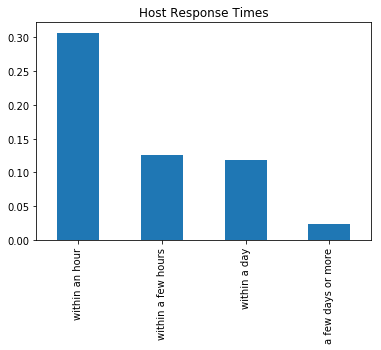

In [16]:
# Explore Categorical Feature - host_response_time
host_response_vals = df_listings['host_response_time'].value_counts()
(host_response_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Host Response Times");

#### FINDINGS

It looks like a good percentage of hosts respond within an hour.

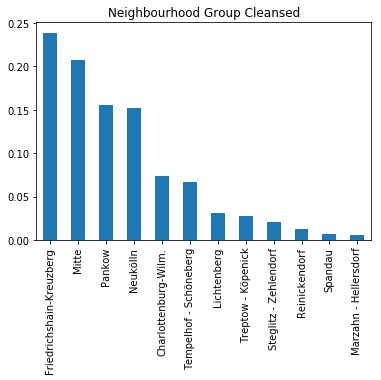

In [17]:
# Explore Categorical Feature - neighborhood_group_cleansed
neigh_vals = df_listings['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");

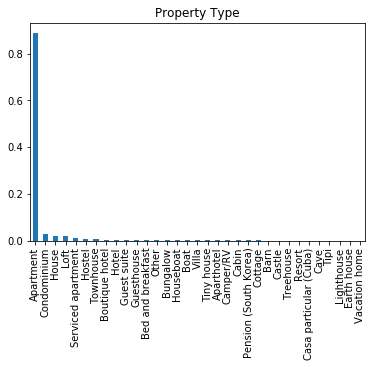

In [18]:
# Explore Categorical Feature - property_type
prop_vals = df_listings['property_type'].value_counts()
(prop_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Property Type");

#### FINDINGS

It's good to know that the apartments dominate the listings data set. We can focus on this if needed for any of our analysis.

### REVIEWS Data Set

Next, let's explore the Reviews data set. We wil be looking at a few things:
1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column

In [19]:
# Print rows and columns in reviews data set
print("Number of rows and columns: ", df_reviews.shape)
# Assess null values
print(df_reviews.isnull().sum())
# Describe
print(df_reviews.describe(include='all'))

Number of rows and columns:  (501002, 6)
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         242
dtype: int64
          listing_id            id        date   reviewer_id reviewer_name  \
count   5.010020e+05  5.010020e+05      501002  5.010020e+05        501002   
unique           NaN           NaN        3141           NaN         61625   
top              NaN           NaN  2019-06-02           NaN       Michael   
freq             NaN           NaN        1283           NaN          3340   
mean    1.291820e+07  2.638157e+08         NaN  7.507297e+07           NaN   
std     1.002893e+07  1.558552e+08         NaN  7.211280e+07           NaN   
min     1.944000e+03  4.283000e+03         NaN  3.190000e+02           NaN   
25%     3.485841e+06  1.306522e+08         NaN  1.706364e+07           NaN   
50%     1.189906e+07  2.619161e+08         NaN  4.764211e+07           NaN   
75%     2.044847e+07  4.132042e+08      

## 3. DATA PREPARATION


### Question 1 - PRICE ANALYSIS

**1.** Understand price increases/decreases by season and detect peak season in Berlin <br>
**2.** Understand price increases/decreases by neighborhood and detect pricey neighborhoods in Berlin <br>
**3.** Understand how property types within neighborhoods impact price for a handful of neighborhoods and property types

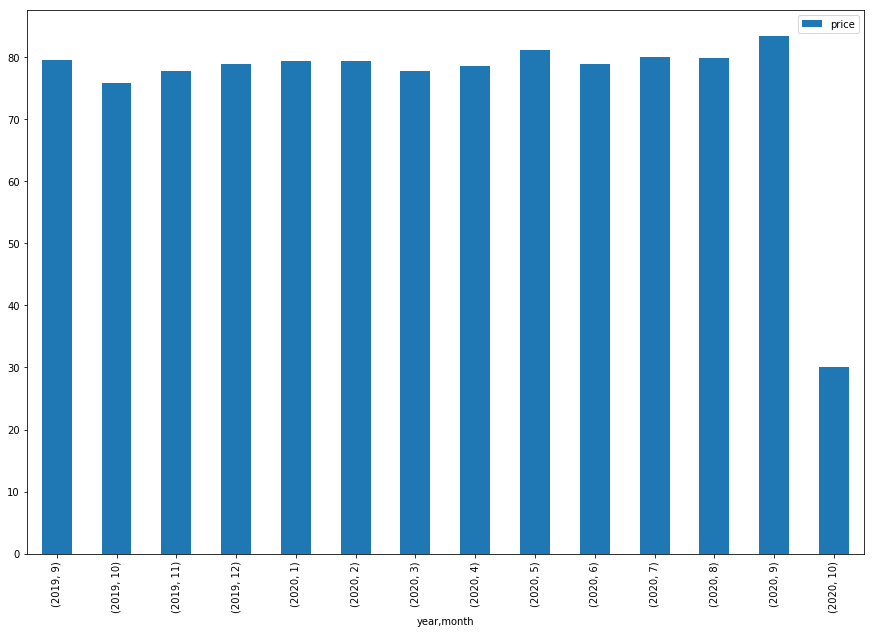

In [20]:
# Plot the average price by month 
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month

# In order to average price, we will be converting it to float and removing the $ sign
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

df_calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar",figsize=(15,10));

#### FINDINGS

Based on the above chart, it shows that September is the peak month. A quick Google search (https://travel.usnews.com/Berlin_Germany/When_To_Visit/) confirms my assumption that September have the best weather in Berlin.

Also, it seems like the average price is more or less the same.

                                                price
neighbourhood_cleansed                               
Forst Grunewald                            400.000000
Volkspark Wilmersdorf                      345.891509
Allende-Viertel                            185.600000
Schöneberg-Nord                            170.172291
Frankfurter Allee Süd                      164.951220
Marzahn-Nord                               146.750000
Haselhorst                                 140.000000
Alexanderplatz                             133.815557
Regierungsviertel                          122.625000
Düsseldorfer Straße                        118.037634
Rummelsburger Bucht                        107.530612
Kurfürstendamm                             106.605263
Weißensee                                   98.952607
Schmöckwitz/Karolinenhof/Rauchfangswerder   97.375000
Zehlendorf  Südwest                         93.714286
Müggelheim                                  92.636364
West 1                      

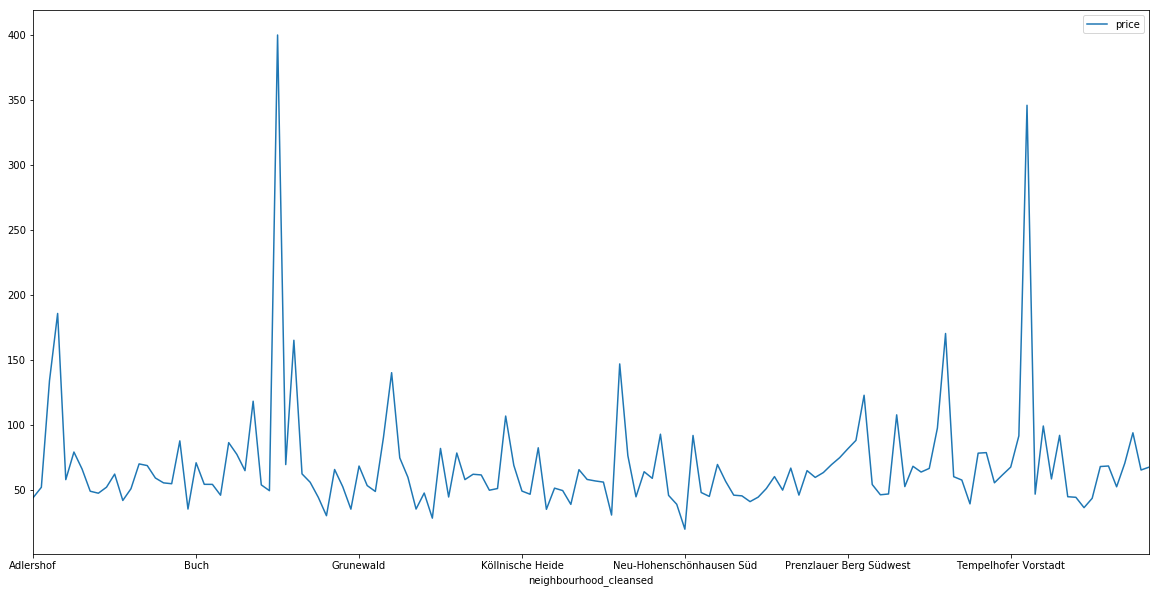

In [21]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

print(df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot(figsize=(20,10));


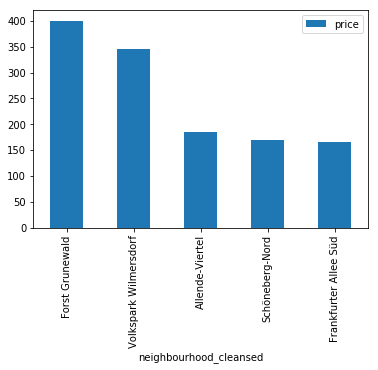

In [22]:
# Plot top 10 neighborhoods
top10_neigh = df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar');

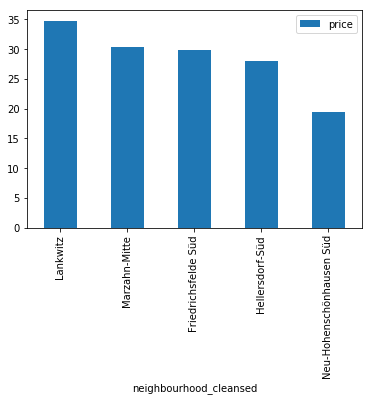

In [23]:
# Plot bottom 10 neighborhoods
bottom10_neigh = df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail()
bottom10_neigh.plot(kind='bar');

#### FINDINGS

Based on the above analysis, there is definitely price fluctuations based on neighborhoods. The Forst Grunewald seems like the priciest of all, averaging at $400.

Followed by Volkspark Wilmersdorf at $346.

Neu-Hohenschönhausen seems like the cheapest at $18.5 average price.


In [24]:
# Explore property types within neighborhoods and how they impact price
# Focus on the top 5 expensive Neighborhoods from above - Forst Grunewald','Volkspark Wilmersdorf','Allende-Viertel','Schöneberg-Nord','Frankfurter Allee Süd'
# Focus on property type: Apartment

values_keep_neigh = ('Regierungsviertel','Volkspark Wilmersdorf','Alexanderplatz','Schöneberg-Nord','Frankfurter Allee Süd')
values_keep_prop = ('Apartment','Condominium')
df_listings_pruned1 = df_listings.loc[df_listings['neighbourhood_cleansed'].isin(values_keep_neigh)]
df_listings_pruned2 = df_listings_pruned1.loc[df_listings['property_type'].isin(values_keep_prop)]

df_neigh_prop = df_listings_pruned2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
df_neigh_prop

,neighbourhood_cleansed,property_type,price
0,Alexanderplatz,Apartment,87.503968
1,Alexanderplatz,Condominium,107.634146
2,Frankfurter Allee Süd,Apartment,179.805556
3,Frankfurter Allee Süd,Condominium,16.000000
4,Regierungsviertel,Apartment,116.989744
5,Regierungsviertel,Condominium,81.777778
6,Schöneberg-Nord,Apartment,61.329980
7,Schöneberg-Nord,Condominium,72.125000
8,Volkspark Wilmersdorf,Apartment,66.251397
9,Volkspark Wilmersdorf,Condominium,45.000000


In [25]:
price_arr = df_neigh_prop['price'].values
price_arr = np.reshape(price_arr, (5,2))
price_arr.shape


(5, 2)

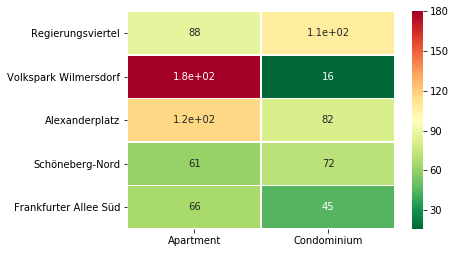

In [26]:

idx = ['Regierungsviertel','Volkspark Wilmersdorf','Alexanderplatz','Schöneberg-Nord','Frankfurter Allee Süd']
cols = ['Apartment','Condominium']
df = pd.DataFrame(price_arr, index=idx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True);

#### FINDINGS

I focused on the top 5 expensive neighbourhoods that offer apartments and condominiums as they make up a good percentage of the property types.

Based on the above, we can see that apartments in Volkspark Wilmersdorf are the most expensive followed by the apartments in Alexanderplatz and condominiums in Regierungsviertel. It is interesting to note that in Volkspark Wilmersdorf have both the highest and the lowest price. 


### Question 2 - SENTIMENT ANALYSIS OF REVIEWS

**1.** Understand positive and negative sentiments from review comments <br>
**2.** Map the positive and negative sentiments to neighborhoods to understand which neighborhoonds rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale <br>
**3.** Explore some of the worst reviews

In [27]:
# Create a smaller data frame with just listing ids and review comments
df_comments = df_reviews[['listing_id', 'comments']].copy()
df_comments.head()

,listing_id,comments
0,1944,I want to thank Laura&Emiliano for their hospi...
1,1944,Very convenient and very quiet. You will stay...
2,1944,I've spent 2 nights at place of Laura and Emil...
3,1944,The reservation was canceled 2 days before arr...
4,1944,Laura est très sympathique et l'appartement fa...


In [28]:
# Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
# Initially, I tried with the neighbourhood field in the listings dataset, but found that some values were blank, so I used neighbourhood_cleansed field
def get_neighborhood(listing_id):
    '''
    Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
    INPUT:
    listing_id - listing_id field for a particular listing
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed field associated with a particular listing_id
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    neighbourhood = df_listings.loc[df_listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

# Test function
get_neighborhood(1944)

'Brunnenstr. Nord'

In [29]:
# Apply get_neighborhood function to the listing ids
df_comments['neighbourhood'] = df_comments['listing_id'].apply(get_neighborhood)
df_comments.head()

,listing_id,comments,neighbourhood
0,1944,I want to thank Laura&Emiliano for their hospi...,Brunnenstr. Nord
1,1944,Very convenient and very quiet. You will stay...,Brunnenstr. Nord
2,1944,I've spent 2 nights at place of Laura and Emil...,Brunnenstr. Nord
3,1944,The reservation was canceled 2 days before arr...,Brunnenstr. Nord
4,1944,Laura est très sympathique et l'appartement fa...,Brunnenstr. Nord


In [30]:
# Check to see if any listing ids don't have neighborhoods associated
df_comments['neighbourhood'].isnull().sum()

0

In [31]:
# SentimentIntensityAnalyzer reference: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    '''
    Function to run sentiment intensity analyzer on a sentence and return compound polarity score
    INPUT:
    sentence - the text of the review comments 
    OUTPUT:
    score['compound'] - the compound score combining the positive, negative and neutral scores
    
    Provides the compound score for a particular sentence for sentiment analysis
    '''
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']


df_comments['polarity_score'] = df_comments['comments'].apply(sentiment_analyzer_scores)
df_comments.head()

,listing_id,comments,neighbourhood,polarity_score
0,1944,I want to thank Laura&Emiliano for their hospi...,Brunnenstr. Nord,0.8689
1,1944,Very convenient and very quiet. You will stay...,Brunnenstr. Nord,0.9107
2,1944,I've spent 2 nights at place of Laura and Emil...,Brunnenstr. Nord,0.9767
3,1944,The reservation was canceled 2 days before arr...,Brunnenstr. Nord,0.0000
4,1944,Laura est très sympathique et l'appartement fa...,Brunnenstr. Nord,0.0000


In [32]:
# Print number of positive, negative and neutral compound polarity scores
print('Positive compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] > 0].count())
print('Negative compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] < 0].count())
print('Neutral compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] == 0].count())


Positive compound scores:  358619
Negative compound scores:  66501
Neutral compound scores:  75882


In [33]:
# Group by neighbourhood and average the polarity scores
neigh_polarity = df_comments.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

                         polarity_score
neighbourhood                          
südliche Luisenstadt           0.642995
Reuterstraße                   0.626197
nördliche Luisenstadt          0.622501
Tempelhofer Vorstadt           0.589765
Regierungsviertel              0.586320
Südliche Friedrichstadt        0.586009
Prenzlauer Berg Südwest        0.579809
Brunnenstr. Süd                0.578151
Schillerpromenade              0.568751
Alexanderplatz                 0.563578


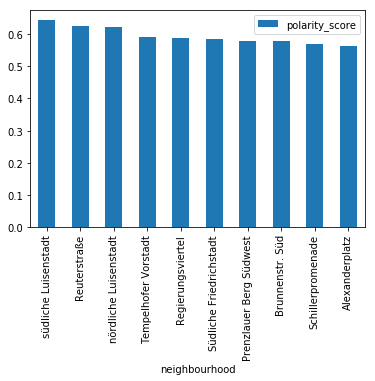

In [34]:
# Visualize top neighborhoods based on reviews
print(neigh_polarity.head(10))
neigh_polarity.head(10).plot(kind='bar');


                                           polarity_score
neighbourhood                                            
Allende-Viertel                                  0.099242
Kölln. Vorstadt/Spindlersf.                      0.075553
Friedrichshagen                                  0.073867
Köpenick-Süd                                     0.035524
Gatow / Kladow                                   0.023572
Schmöckwitz/Karolinenhof/Rauchfangswerder        0.018410
Rahnsdorf/Hessenwinkel                           0.011096
Hakenfelde                                       0.005371
Hellersdorf-Ost                                 -0.007917
Altstadt-Kietz                                  -0.026074


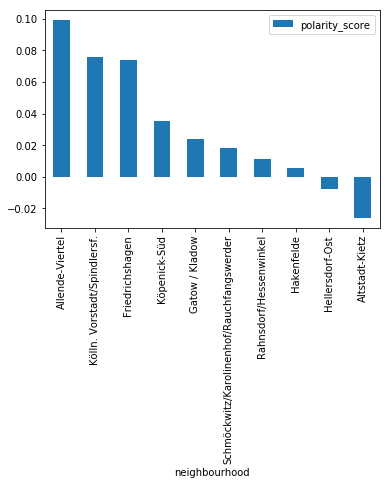

In [35]:
# Visualize bottom 10 neighborhoods based on reviews
print(neigh_polarity.tail(10))
neigh_polarity.tail(10).plot(kind='bar');

#### FINDINGS

südliche Luisenstadt, Reuterstraße and nördliche Luisenstadt are some of the neighborhoods that have top reviews. Relatively, the lower ranking neighborhoods are Altstadt-Kietz, Hellersdorf-Ost and Hakenfelde 

In [36]:
# Explore the worst reviews
df_comments.sort_values(by='polarity_score',ascending=False).tail(10)


,listing_id,comments,neighbourhood,polarity_score
240215,11294127,Der Aufenthalt bei Myriam u. Mathis war toll. ...,Buckow,-0.9980
341017,18044136,Die Wohnung hat eigentlich eine Bewertung von ...,Schöneberg-Süd,-0.9980
72243,1234638,Die Ankuft in der Wohnung war gut. Wir wurden ...,Frankfurter Allee Nord,-0.9981
299340,15369165,ICH WARNE ALLE INTERESSENTEN DRINGEND VOR DIES...,Heerstraße Nord,-0.9982
137639,4150220,"Zunächst möchte ich sagen, dass ich eine sehr ...",Frankfurter Allee Süd FK,-0.9982
494560,35090506,"Handtücher, Bettwäsche, Möbel etc. in Ordnung....",Prenzlauer Berg Ost,-0.9983
240207,11294127,Die Begrüßung der Hausherrin war wenig herzlic...,Buckow,-0.9985
29515,322520,Die Schlüsselübergabe funktionierte bei uns pe...,Prenzlauer Berg Nord,-0.9985
462810,29069957,SCHREKLICHE ERFAHRUNG: (Spanish version below)...,Wedding Zentrum,-0.9985
111824,2697520,"Sehr schöne Wohnung, tolle Ausstattung – Wir h...",Brunnenstr. Nord,-0.9986


#### FINDINGS

It is interesting to see that most of the reviews that were rated badly on the polarity score are not all bad. This might be explained by the fact that the reviews were in German! Perhaps this is a limitation of the Sentiment Intensity Analyzer. 

### Question 3 - PRICE PREDICTION

**1.** Predict price for a given listing. <br>
**2.** What factors correlate well to predicting price?


In [37]:
# Check if price has missing values, if it does, we want to remove those records from the dataset
df_listings['price'].isnull().sum()

0

#### FINDINGS

All records in the listings dataset have price information available to use.

Based on the field definitions, there are some columns that seem less likely to impact price, so we will drop these from the dataset in order to work with a cleaner and smaller dataset. The reasons for dropping these fields are mostly:
- ID field or meta data associated with the listing
- Other fields that capture same/similar information (eg: using country code and dropping country)
- Dropping very granular fields such as street, zipcode, latitude, longitude etc. and keeping the analysis at the city level

The columns we will be dropping are:
id,listing_url,scrape_id,last_scraped,thumbnail_url,medium_url,xl_picture_url,host_id,
host_url,host_thumbnail_url,host_verifications,street,neighbourhood,neighbourhood_group_cleansed,zipcode,smart_location,country,latitude,longitude,weekly_price,monthly_price,calendar_updated,calendar_last_scraped,first_review,last_review,
calculated_host_listings_count,reviews_per_month

In [38]:
df_listings.shape

(24422, 106)

In [39]:
# Drop columns that are less likely to have an impact on price
df_list = df_listings.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month']
df_list = df_list.drop(cols_less_impact, axis=1)
df_list.shape

(24422, 79)

In [40]:
# Find columns with all missing values if any 
df_list.columns[df_list.isnull().all()].tolist()

['host_acceptance_rate', 'jurisdiction_names']

In [41]:
# Drop host_acceptance_rate,jurisdiction_names column
df_list = df_list.drop('jurisdiction_names', axis=1)
df_list = df_list.drop('host_acceptance_rate', axis=1)
df_list.shape

(24422, 77)

In [42]:
# Review all the numerical columns and assess missing values

num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 32
host_total_listings_count 32
bathrooms 25
bedrooms 23
beds 29
square_feet 23992
price 0
minimum_nights_avg_ntm 0
maximum_nights_avg_ntm 0
review_scores_rating 4610
review_scores_accuracy 4635
review_scores_cleanliness 4632
review_scores_checkin 4654
review_scores_communication 4637
review_scores_location 4653
review_scores_value 4656


#### FINDINGS

bathrooms - There are 25 rows with Nan for bathrooms. Since it's a small percentage of rows, I have decided to set bathrooms to 0 for Nan values

bedrooms - Looking at the dataset, since all the rows with blank bedroom field have beds value of at least 1, I will use 1 for bedrooms where bedrooms is Nan

beds - For the 1 record that have beds as Nan, bed_type is specified as Real Bed, so I will set beds to 1 for this case

square_feet - Since a good percentage of this field is Nan, I am going to drop this column

review_scores columns - Since these are review related scores, I will be setting all Nan values to 0 assuming no review scores for these listings.

host_listings_count and host_total_listings_count - There are only 32 rows with no values. Looking at the data, I determined that these host IDs only have 1 record associated with them each, so I decided to populate with 1.

In [43]:
# Set 0 for bathroom where bathroom is Nan
df_list['bathrooms'] = df_list['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
df_list['bedrooms'] = df_list['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
df_list['beds'] = df_list['beds'].fillna(1)

# Drop square_feet column
df_list = df_list.drop('square_feet',axis=1)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_list[col] = df_list[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
df_list['host_listings_count'] = df_list['host_listings_count'].fillna(1)
df_list['host_total_listings_count'] = df_list['host_total_listings_count'].fillna(1)


In [44]:
# Check again all the numerical columns
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 0
host_total_listings_count 0
bathrooms 0
bedrooms 0
beds 0
price 0
minimum_nights_avg_ntm 0
maximum_nights_avg_ntm 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0


In [45]:
# Review all the categorical columns and assess missing values

cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

name 51
summary 1191
space 8588
description 385
experiences_offered 0
neighborhood_overview 10872
notes 16554
transit 9479
access 13100
interaction 12241
house_rules 12042
picture_url 0
host_name 32
host_since 32
host_location 119
host_about 12359
host_response_time 10411
host_response_rate 10411
host_is_superhost 32
host_picture_url 32
host_neighbourhood 5227
host_has_profile_pic 32
host_identity_verified 32
neighbourhood_cleansed 0
city 6
state 124
market 58
country_code 0
is_location_exact 0
property_type 0
room_type 0
bed_type 0
amenities 0
security_deposit 9508
cleaning_fee 7194
extra_people 0
has_availability 0
requires_license 0
license 21926
instant_bookable 0
is_business_travel_ready 0
cancellation_policy 1
require_guest_profile_picture 0
require_guest_phone_verification 0


#### FINDINGS


access 13100
interaction 12241
house_rules 12042
host_picture_url 32
host_neighbourhood 5227
license 21926
cancellation_policy 1
neighbourhood_cleansed 0
country_code 0
is_location_exact 0
room_type 0
bed_type 0
extra_people 0
has_availability 0
requires_license 0
instant_bookable 0
is_business_travel_ready 0

* **summary, space, neighborhood_overview, notes, transit**  - Since these are all text fields describing the property in some way, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like summary and transit towards price prediction.

* **host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood** - Since these are all fields that are descriptive about the host, I am going to convert these fields into boolean fields as well to indicate if a value exists or not.

* **host_response_time** - These field seems to have N/A as a valid value, so I will assign N/A where Nan values exist.

* **host_response_rate** - Looking at the data, since this is a percentage value and the range is quite distributed, I will be converting this to float and setting N/A and blanks to 0.

* **host_is_superhost, host_has_profile_pic, host_identity_verified - These are boolean fields with t or f values. Assign 1 for t, 0 for f and assign Nans with 0

property_type - Since this is just 1 record, we will just drop this record

* **security_deposit** - We will assume a 0 security deposit for where it is not specified. We will also remove $ signs and convert to float

* **cleaning_fee** - We will assume a 0 cleaning_fee where it is not specified. We will also remove $ signs and convert to float


* **name, description, picture_url** - Since these are all text fields as well, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like description and picture_url towards price prediction.

* **experiences_offered** - all values in this column are 'none' and it doesn't add any value, so we will be dropping this column

* **city** - There are some missing values for city . the nan will be replaced by Berlin and all city names to lowercase in    order to standardize. 
* **market, state** - all values are 'Berlin' in this column, since we have other descriptors for Berlin, we will be dropping this column

* **is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification** - these fields have t/f values, will convert to 1/0.

* **extra_people** - Need to remove $ sign and convert to float

* **amenities** - this field contains a list of values in each row, we will need to figure out how to handle this column

In [46]:
# Function to set all text fields to boolean
def set_bool_text(textdata):
    '''
    Function to set all text fields to boolean
    INPUT:
    textdata - the textdata that needs to be converted into a bool value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate presence of the text field
    
    Converts the text columns into a boolean field representing the presence or absence of the text field
    '''
    if not textdata:
        return 0
    else:
        return 1


text_host_fields = []
for t in text_host_fields:
    df_list[t] = df_list[t].apply(set_bool_text)

In [47]:
# Function to set all t/f fields to 1/0
def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = []
for t in tf_fields:
    df_list[t] = df_list[t].apply(set_bool_tf)